# Kaggle competition: Predict the Introverts from the Extroverts
> By Ricardo Arias
> Competition available at https://www.kaggle.com/competitions/playground-series-s5e7/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/train.csv')
display(df.head())
display(df.info())

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


None

In [2]:
df.drop(columns=['id'], inplace=True)

# EDA

In [3]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,3.137764,5.265106,4.044319,7.996737,4.982097
std,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,5.000000,3.000000
50%,2.000000,5.000000,4.000000,8.000000,5.000000
75%,4.000000,8.000000,6.000000,12.000000,7.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [4]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

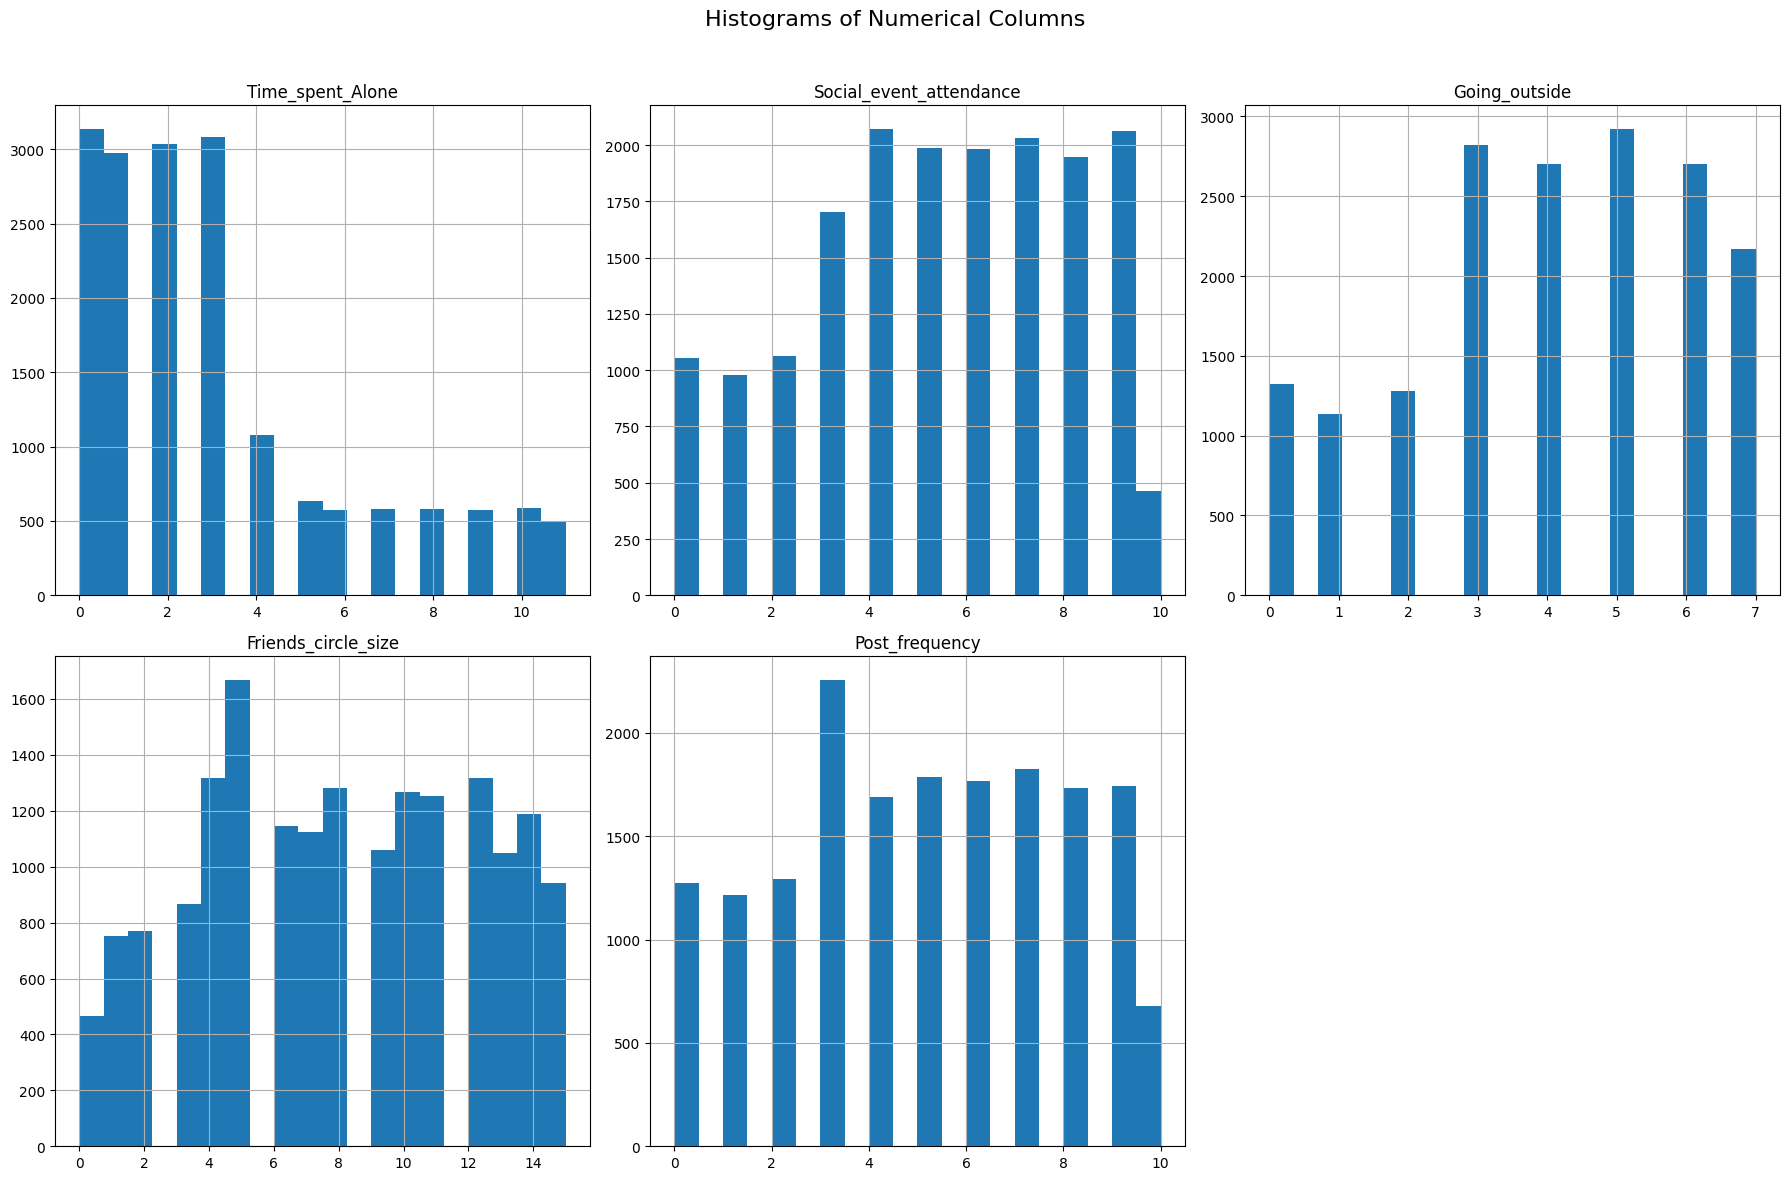

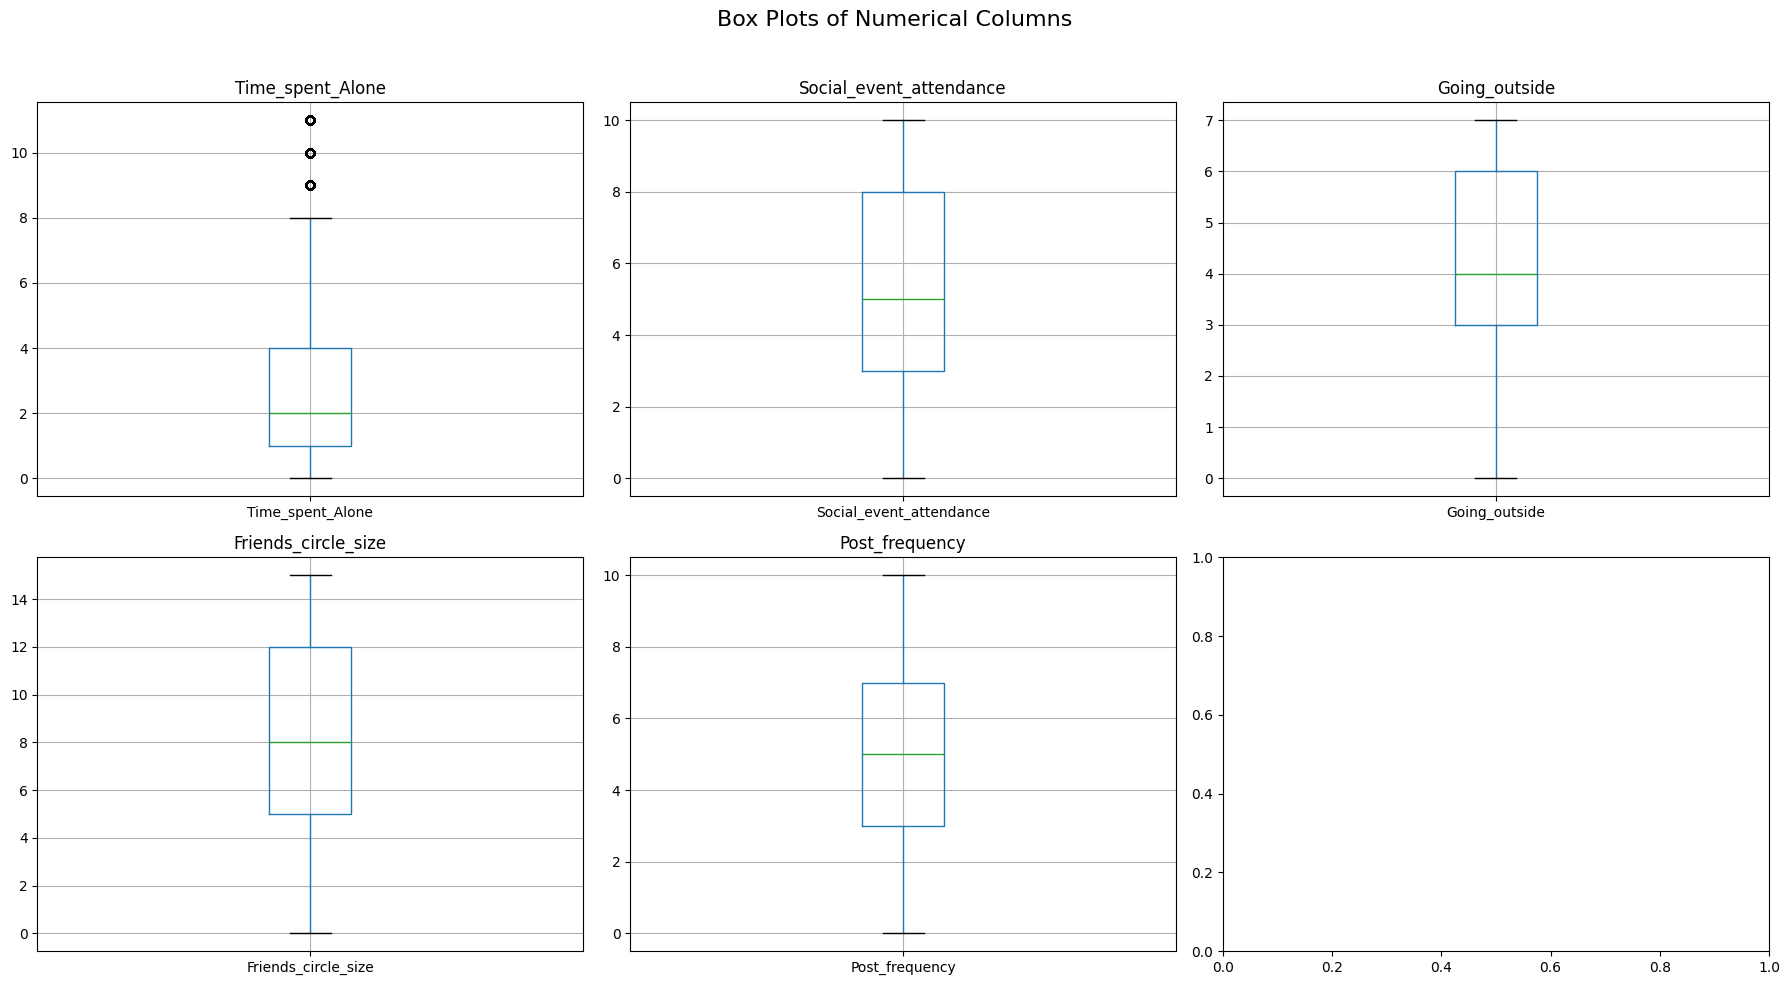

In [5]:
# Histograms for each numerical column
df[numeric_features].hist(figsize=(18, 12), bins=20, layout=(2, 3))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plots for each numerical column
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flatten(), numeric_features):
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)
plt.suptitle('Box Plots of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

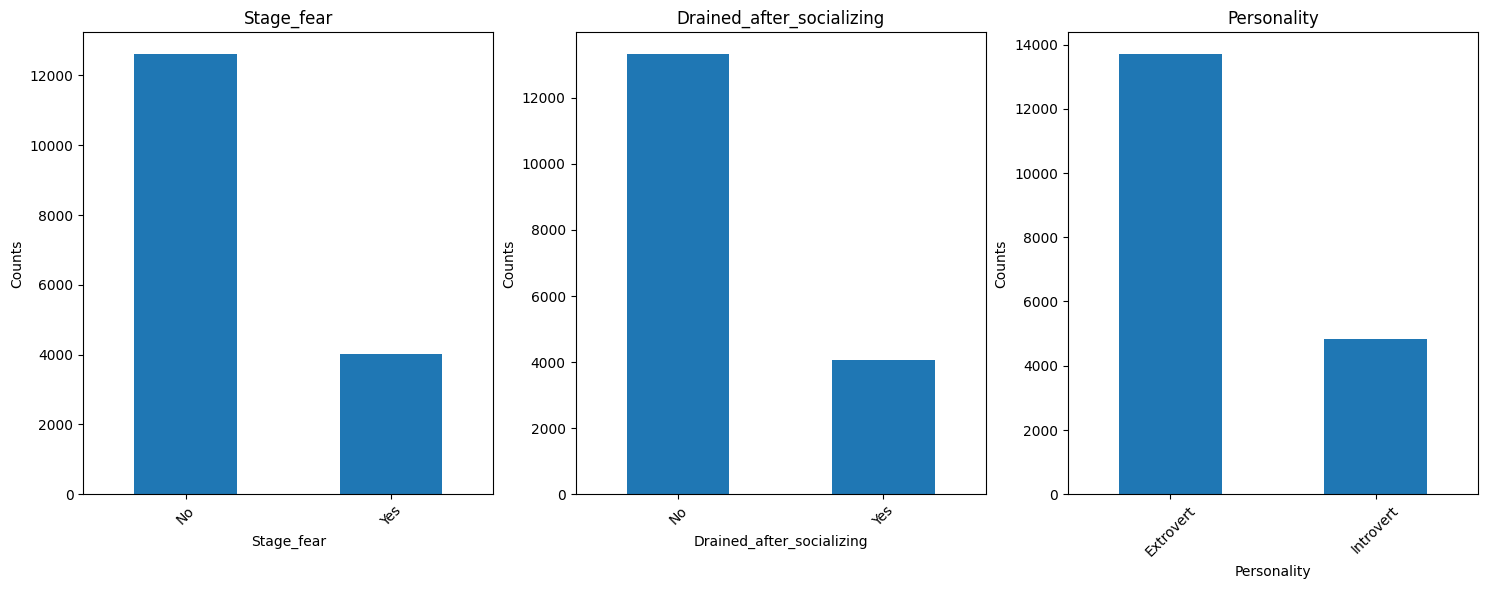

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, col in zip(axes.flatten(), categorical_features):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(col)
    ax.set_ylabel('Counts')

# Preprocessing

## Encoding and scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
X = df.drop(columns=['Personality'])
y = df['Personality']

mm = MinMaxScaler()
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

X_categorical = X[categorical_features.drop('Personality')]
X_numerical = X[numeric_features]
X_categorical_encoded = ohe.fit_transform(X_categorical).toarray()
X_numerical_scaled = mm.fit_transform(X_numerical)

X_encoded = pd.DataFrame(X_categorical_encoded, columns=ohe.get_feature_names_out(categorical_features.drop('Personality')))
X_scaled = pd.DataFrame(X_numerical_scaled, columns=numeric_features)
X = pd.concat([X_scaled, X_encoded], axis=1)

le = LabelEncoder()
y = le.fit_transform(y)

display(X.head())
display(y[:5])

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,0.000000,0.6,0.571429,1.000000,0.5,0.0,0.0,0.0,0.0
1,0.090909,0.7,0.428571,0.666667,0.8,0.0,0.0,0.0,0.0
2,0.545455,0.1,0.000000,0.200000,0.0,1.0,0.0,0.0,1.0
3,0.272727,0.7,0.428571,0.733333,0.5,0.0,0.0,0.0,0.0
4,0.090909,0.4,0.571429,0.866667,NaN,0.0,0.0,0.0,0.0


array([0, 0, 1, 0, 0])

## Imputation

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
cols = X.columns
X = pd.DataFrame(imputer.fit_transform(X), columns=cols)
display(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               18524 non-null  float64
 1   Social_event_attendance        18524 non-null  float64
 2   Going_outside                  18524 non-null  float64
 3   Friends_circle_size            18524 non-null  float64
 4   Post_frequency                 18524 non-null  float64
 5   Stage_fear_Yes                 18524 non-null  float64
 6   Stage_fear_nan                 18524 non-null  float64
 7   Drained_after_socializing_Yes  18524 non-null  float64
 8   Drained_after_socializing_nan  18524 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


None

## Outlier cleaning

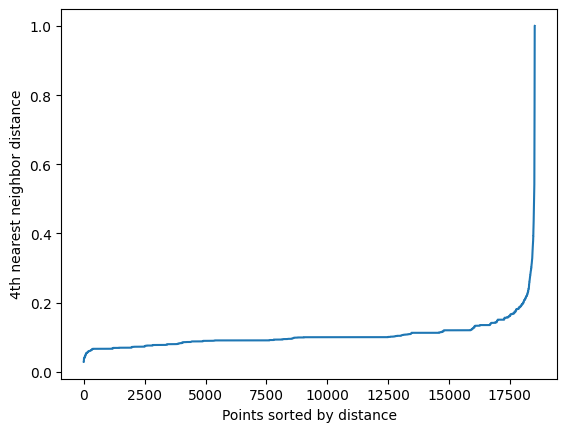

In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X)
dists, _ = neigh.kneighbors(X)
k_dist = np.sort(dists[:, -1])  # distancia al 4.º vecino
plt.plot(k_dist)
plt.ylabel("4th nearest neighbor distance")
plt.xlabel("Points sorted by distance")
plt.show()

We'll use `eps=0.13` as the value to clean outliers.

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.13, min_samples=5)
outliers = dbscan.fit_predict(X) == -1
X_cleaned = X[~outliers]
y_cleaned = y[~outliers]

In [11]:
display(X_cleaned.info())
display(y_cleaned.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 17056 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               17056 non-null  float64
 1   Social_event_attendance        17056 non-null  float64
 2   Going_outside                  17056 non-null  float64
 3   Friends_circle_size            17056 non-null  float64
 4   Post_frequency                 17056 non-null  float64
 5   Stage_fear_Yes                 17056 non-null  float64
 6   Stage_fear_nan                 17056 non-null  float64
 7   Drained_after_socializing_Yes  17056 non-null  float64
 8   Drained_after_socializing_nan  17056 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


None

(17056,)

# Class balancing

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_cleaned, y_cleaned)

In [ ]:
display(X_balanced.info())
display(y_balanced.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26982 entries, 0 to 26981
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               26982 non-null  float64
 1   Social_event_attendance        26982 non-null  float64
 2   Going_outside                  26982 non-null  float64
 3   Friends_circle_size            26982 non-null  float64
 4   Post_frequency                 26982 non-null  float64
 5   Stage_fear_Yes                 26982 non-null  float64
 6   Drained_after_socializing_Yes  26982 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB


None

(26982,)

# Model training and selection

In [17]:
from sklearn.model_selection import GridSearchCV

## SVM

In [ ]:
from sklearn.svm import LinearSVC
svm_grid = [
    {
        'C': np.logspace(-3, 3, 7),
        'max_iter': [1000]
    }
]

svm_cv = GridSearchCV(LinearSVC(random_state=42), svm_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
svm_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .............................C=0.001, max_iter=1000; total time=   0.0s
[CV] END .............................C=0.001, max_iter=1000; total time=   0.0s
[CV] END .............................C=0.001, max_iter=1000; total time=   0.0s
[CV] END .............................C=0.001, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.01, max_iter=1000; total time=   0.0s
[CV] END .............................C=0.001, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.01, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.01, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.01, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.01, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, ma

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'max_iter': [1000]}],
             scoring='accuracy', verbose=2)

In [ ]:
display(f"Best estimator: {svm_cv.best_estimator_}")
display(f"Best score: {svm_cv.best_score_}")

'Best estimator: LinearSVC(C=np.float64(0.001), random_state=42)'

'Best score: 0.9618263337963476'

## Gradient-boosted trees

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_grid = [
    {
        'max_iter': [1000],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': np.linspace(0.0001, 0.1, 4),
        'l2_regularization': np.linspace(0.03, 3, 4),
        'max_leaf_nodes': [None, 31, 63, 127],
    }
]
hgb_cv = GridSearchCV(HistGradientBoostingClassifier(random_state=42), hgb_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
hgb_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=63; total time=   2.6s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=31; total time=   2.7s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=None; total time=   3.0s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=31; total time=   2.8s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=None; total time=   2.8s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=None; total time=   2.7s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, max_leaf_nodes=31; total time=   2.8s
[CV] END l2_regularization=0.03, learning_rate=0.0001, max_depth=3, max_iter=1000, 

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'l2_regularization': array([0.03, 1.02, 2.01, 3.  ]),
                          'learning_rate': array([0.0001, 0.0334, 0.0667, 0.1   ]),
                          'max_depth': [3, 5, 7, 9], 'max_iter': [1000],
                          'max_leaf_nodes': [None, 31, 63, 127]}],
             scoring='accuracy', verbose=2)

In [ ]:
display(f"Best estimator: {hgb_cv.best_estimator_}")
display(f"Best score: {hgb_cv.best_score_}")

'Best estimator: HistGradientBoostingClassifier(l2_regularization=np.float64(2.0100000000000002),\n                               learning_rate=np.float64(0.1), max_depth=9,\n                               max_iter=1000, max_leaf_nodes=127,\n                               random_state=42)'

'Best score: 0.9706476211353726'

## Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

bagging_grid = [
    {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.7, 0.9],
        'max_features': [0.5, 0.7, 0.9],
        'bootstrap': [True, False],
        'estimator': [
                        DecisionTreeClassifier(max_depth=35, random_state=42),
                        DecisionTreeClassifier(max_depth=40, random_state=42),
                        DecisionTreeClassifier(max_depth=50, random_state=42),
                        DecisionTreeClassifier(max_depth=60, random_state=42),
                      ]
    }
]
bagging_cv = GridSearchCV(BaggingClassifier(random_state=42), bagging_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
bagging_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, estimator=DecisionTreeClassifier(max_depth=35, random_state=42), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, estimator=DecisionTreeClassifier(max_depth=35, random_state=42), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, estimator=DecisionTreeClassifier(max_depth=35, random_state=42), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, estimator=DecisionTreeClassifier(max_depth=35, random_state=42), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, estimator=DecisionTreeClassifier(max_depth=35, random_state=42), max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, estimator=DecisionTreeClassifier(max_depth=35, random_state=42), max_features=0.5, max_samples=0.5, n_esti

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'estimator': [DecisionTreeClassifier(max_depth=35,
                                                               random_state=42),
                                        DecisionTreeClassifier(max_depth=40,
                                                               random_state=42),
                                        DecisionTreeClassifier(max_depth=50,
                                                               random_state=42),
                                        DecisionTreeClassifier(max_depth=60,
                                                               random_state=42)],
                          'max_features': [0.5, 0.7, 0.9],
                          'max_samples': [0.5, 0.7, 0.9],
                          'n_estimators': [10, 20, 30]}],
             scoring='accuracy', verbose=2)

In [32]:
display(f"Best estimator: {bagging_cv.best_estimator_}")
display(f"Best score: {bagging_cv.best_score_}")

'Best estimator: BaggingClassifier(bootstrap=False,\n                  estimator=DecisionTreeClassifier(max_depth=35,\n                                                   random_state=42),\n                  max_features=0.7, max_samples=0.9, n_estimators=30,\n                  random_state=42)'

'Best score: 0.9760446366201517'

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_grid = [
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': np.linspace(0.01, 1, 5),
        'estimator': [LinearSVC(), DecisionTreeClassifier()],
    }
]
ada_cv = GridSearchCV(AdaBoostClassifier(random_state=42), ada_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
ada_cv.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=50; total time=   1.5s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=50; total time=   1.5s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=50; total time=   1.8s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=50; total time=   2.2s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=50; total time=   2.7s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=100; total time=   3.1s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=100; total time=   3.7s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=100; total time=   4.1s
[CV] END estimator=LinearSVC(), learning_rate=0.2575, n_estimators=50; total time=   2.0s
[CV] END estimator=LinearSVC(), learning_rate=0.01, n_estimators=100; total time=   4.3s
[CV] END estimator=LinearSVC(), learning_rate=0.01, 

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'estimator': [LinearSVC(), DecisionTreeClassifier()],
                          'learning_rate': array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ]),
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy', verbose=2)

In [ ]:
display(f"Best estimator: {ada_cv.best_estimator_}")
display(f"Best score: {ada_cv.best_score_}")

'Best estimator: AdaBoostClassifier(estimator=LinearSVC(), learning_rate=np.float64(0.01),\n                   random_state=42)'

'Best score: 0.9618263337963476'

# Prediction

In [33]:
df_test = pd.read_csv('./datasets/test.csv')
display(df_test.head())
display(df_test.info())

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


None

In [34]:
ids = df_test['id']
X_test = df_test.drop(columns=['id'])

In [35]:
# Apply the same preprocessing transformations to test data
X_test_categorical = X_test[categorical_features.drop('Personality')]
X_test_numerical = X_test[numeric_features]

# Apply one-hot encoding to categorical features
X_test_categorical_encoded = ohe.transform(X_test_categorical).toarray()

# Apply scaling to numerical features
X_test_numerical_scaled = mm.transform(X_test_numerical)

# Create DataFrames with proper column names
X_test_encoded = pd.DataFrame(X_test_categorical_encoded, columns=ohe.get_feature_names_out(categorical_features.drop('Personality')))
X_test_scaled = pd.DataFrame(X_test_numerical_scaled, columns=numeric_features)

# Concatenate encoded categorical and scaled numerical features
X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)

# Apply KNN imputation
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

display(X_test.head())
display(X_test.info())

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,0.272727,0.7,0.571429,0.400000,0.56,0.0,0.0,0.0,0.0
1,0.690909,0.0,0.000000,0.333333,0.10,1.0,0.0,1.0,0.0
2,0.272727,0.5,0.857143,1.000000,0.90,0.0,0.0,0.0,0.0
3,0.272727,0.4,0.571429,0.333333,0.60,0.0,0.0,0.0,0.0
4,0.818182,0.1,0.285714,0.066667,0.10,1.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               6175 non-null   float64
 1   Social_event_attendance        6175 non-null   float64
 2   Going_outside                  6175 non-null   float64
 3   Friends_circle_size            6175 non-null   float64
 4   Post_frequency                 6175 non-null   float64
 5   Stage_fear_Yes                 6175 non-null   float64
 6   Stage_fear_nan                 6175 non-null   float64
 7   Drained_after_socializing_Yes  6175 non-null   float64
 8   Drained_after_socializing_nan  6175 non-null   float64
dtypes: float64(9)
memory usage: 434.3 KB


None

In [36]:
y_test = bagging_cv.best_estimator_.predict(X_test)

In [37]:
output = pd.concat([ids, pd.Series(le.inverse_transform(y_test), name='Personality')], axis=1)
display(output.head())

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [38]:
output.to_csv('./datasets/submission.csv', index=False)